In [1]:
from time import time
from giskard_vision.landmark_detection.dataloaders.loaders import DataLoader300W
from giskard_vision.landmark_detection.dataloaders.wrappers import CroppedDataLoader, CachedDataLoader
from giskard_vision.landmark_detection.marks.facial_parts import FacialParts
from giskard_vision.landmark_detection.visualisation.draw import draw_marks
from giskard_vision.landmark_detection.tests.performance import *
from giskard_vision.landmark_detection.marks.utils import compute_d_outers
from giskard_vision.landmark_detection.models.base import PredictionResult
import numpy as np

In [2]:
ds = DataLoader300W(dir_path="300W/sample", batch_size=2)

## Visualizing the `radius_limit` 
`radius_limit` is defined as a fraction of the outer canthal distance (i.e. the distance between left and right eyes)

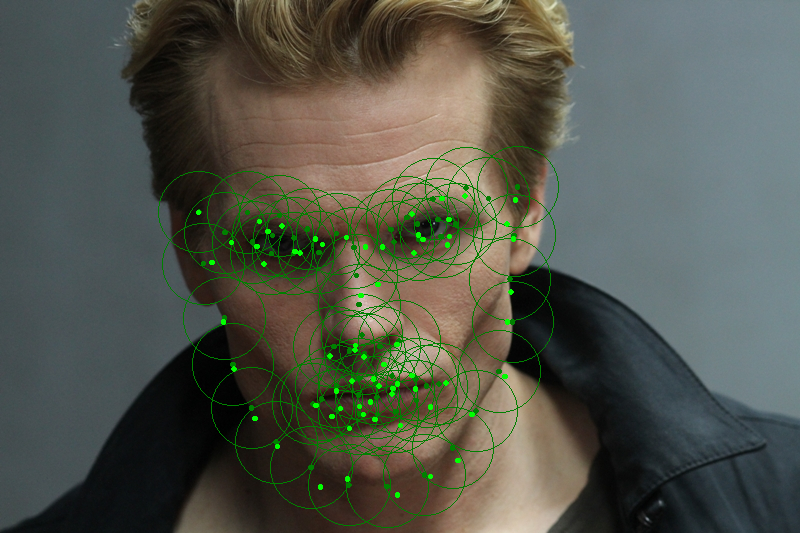

In [3]:
img_idx = 1
image, marks, meta = next(iter(ds))
noisy_marks = marks + 7 * np.random.randn(*marks.shape)

noisy_preds = PredictionResult(noisy_marks)


radius_limit = 0.2
d_outers = compute_d_outers(marks)
noisy_marks[:, ::2] += 0.05 * d_outers
failed_nerfs = NERFMarks.get(noisy_preds, marks, radius_limit=radius_limit)
colors_marks = ["red" if nerf else "green" for nerf in failed_nerfs[img_idx]]
colors_preds = [(255, 127, 0) if nerf else (0, 255, 0) for nerf in failed_nerfs[img_idx]]
draw_marks(
    image[img_idx],
    [marks[img_idx], noisy_marks[img_idx]],
    [colors_marks, colors_preds],
    [False, False],
    radius_limits=[d_outers[img_idx] * radius_limit, None],
)

## Visualizing failing marks predictions 


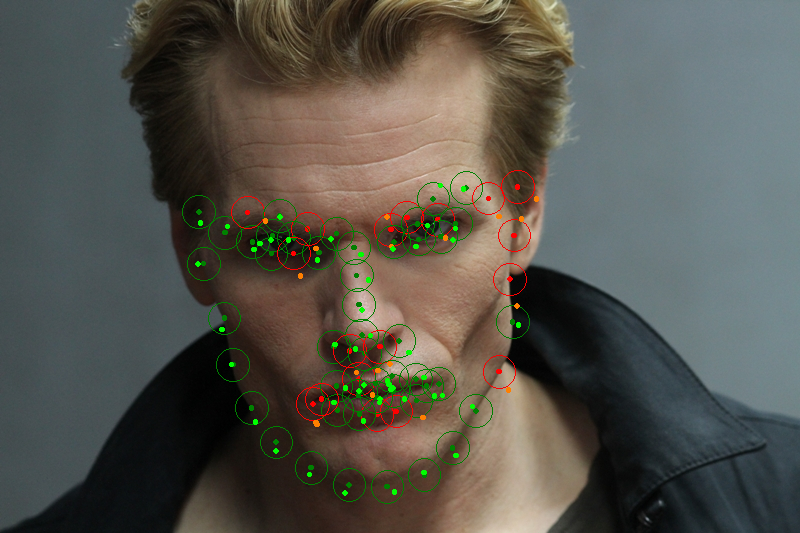

In [4]:
img_idx = 1
image, marks, meta = next(iter(ds))
noisy_marks = marks + 7 * np.random.randn(*marks.shape)

noisy_preds = PredictionResult(noisy_marks)


radius_limit = 0.08
d_outers = compute_d_outers(marks)
noisy_marks[:, ::2] += 0.05 * d_outers
failed_nerfs = NERFMarks.get(noisy_preds, marks, radius_limit=radius_limit)
colors_marks = ["red" if nerf else "green" for nerf in failed_nerfs[img_idx]]
colors_preds = [(255, 127, 0) if nerf else (0, 255, 0) for nerf in failed_nerfs[img_idx]]
draw_marks(
    image[img_idx],
    [marks[img_idx], noisy_marks[img_idx]],
    [colors_marks, colors_preds],
    [False, False],
    radius_limits=[d_outers[img_idx] * radius_limit, None],
)

## Landmark-level available metrics

In [5]:
NEs.get(noisy_preds, marks)

array([[0.1723851 , 0.07798518, 0.12555226, 0.06440206, 0.14883956,
        0.09921689, 0.0666745 , 0.03943476, 0.14189061, 0.09133202,
        0.08091404, 0.02966523, 0.16174784, 0.02459678, 0.09252188,
        0.07755699, 0.1694937 , 0.11562426, 0.1147224 , 0.03659359,
        0.02710277, 0.03089146, 0.09644934, 0.01004214, 0.15178357,
        0.05880757, 0.1147143 , 0.05517418, 0.1782159 , 0.06247638,
        0.04697663, 0.12123859, 0.11207141, 0.0556917 , 0.14460779,
        0.05404201, 0.09142167, 0.07077973, 0.09660701, 0.10918559,
        0.10658123, 0.02726304, 0.10748462, 0.07240962, 0.07113598,
        0.05681515, 0.08017644, 0.0488126 , 0.14483009, 0.03547677,
        0.08902853, 0.1302379 , 0.07447713, 0.06246741, 0.12940785,
        0.0576368 , 0.07954037, 0.14828148, 0.21506798, 0.01190332,
        0.15177186, 0.10564651, 0.13494953, 0.108749  , 0.01359848,
        0.13854857, 0.13392884, 0.03510991],
       [0.05506455, 0.02731823, 0.05594554, 0.0061066 , 0.07029156,
   

In [6]:
NERFMarks.get(noisy_preds, marks, radius_limit=0.05)

array([[1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
        1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
        1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
        1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 1.]])

In [7]:
NERFImagesMean.get(noisy_preds, marks, radius_limit=0.05)

array([1. , 0.5, 1. , 0.5, 1. , 0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0. , 1. ,
       0. , 1. , 1. , 1. , 0.5, 1. , 0. , 0.5, 0. , 1. , 0.5, 1. , 0.5,
       1. , 0.5, 1. , 0.5, 0. , 0.5, 1. , 1. , 1. , 1. , 0.5, 0.5, 0.5,
       0.5, 1. , 0.5, 0.5, 0.5, 1. , 0.5, 1. , 0. , 1. , 0. , 1. , 1. ,
       0.5, 0.5, 1. , 1. , 1. , 1. , 0.5, 0. , 1. , 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5])

In [8]:
NERFImagesStd.get(noisy_preds, marks, radius_limit=0.05)

array([0. , 0.5, 0. , 0.5, 0. , 0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0. , 0. ,
       0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. , 0. , 0.5, 0. , 0.5,
       0. , 0.5, 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5,
       0.5, 0. , 0.5, 0.5, 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,
       0.5, 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5])

In [9]:
NERFMarksMean.get(noisy_preds, marks, radius_limit=0.05)

array([0.79411765, 0.47058824])

In [10]:
NERFMarksStd.get(noisy_preds, marks, radius_limit=0.05)

array([0.40434491, 0.4991342 ])

In [11]:
NERFImages.get(noisy_preds, marks, radius_limit=0.5, failed_mark_ratio=0.1)

0.0

In [12]:
NERFImages.get(noisy_preds, marks, radius_limit=0.05, failed_mark_ratio=0.7)

0.5